<a href="https://colab.research.google.com/github/PavanNuka/Bharath-Internship/blob/main/stock%20prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('/content/AMZN.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


In [4]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600
6256,2022-03-24,3274.989990,3282.370117,3201.000000,3272.989990,3272.989990,2834900


In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [ ]:
pd.isnull(data).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
sorted_data = data.sort_values('Volume', ascending = True).head(10)

In [ ]:
sorted_data

,Date,Open,High,Low,Close,Adj Close,Volume
156,1997-12-26,4.562500,4.645833,4.489583,4.520833,4.520833,487200
61,1997-08-12,2.281250,2.302083,2.197917,2.197917,2.197917,571200
45,1997-07-21,2.177083,2.197917,2.145833,2.182292,2.182292,574800
62,1997-08-13,2.229167,2.229167,2.166667,2.197917,2.197917,590400
11,1997-06-02,1.510417,1.531250,1.500000,1.510417,1.510417,591600
49,1997-07-25,2.218750,2.250000,2.218750,2.229167,2.229167,620400
68,1997-08-21,2.135417,2.171875,2.072917,2.114583,2.114583,624000
20,1997-06-13,1.625000,1.625000,1.583333,1.583333,1.583333,693600
69,1997-08-22,2.104167,2.125000,2.093750,2.125000,2.125000,712800
74,1997-08-29,2.364583,2.375000,2.322917,2.338542,2.338542,722400


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,6257.0,5.650057e+02,9.181122e+02,1.406250,3.901000e+01,105.930,5.961400e+02,3.744000e+03
High,6257.0,5.713457e+02,9.280357e+02,1.447917,3.980000e+01,110.625,6.007500e+02,3.773080e+03
Low,6257.0,5.580047e+02,9.069613e+02,1.312500,3.836000e+01,101.500,5.883000e+02,3.696790e+03
Close,6257.0,5.648173e+02,9.174882e+02,1.395833,3.906000e+01,103.625,5.938600e+02,3.731410e+03
Adj Close,6257.0,5.648173e+02,9.174882e+02,1.395833,3.906000e+01,103.625,5.938600e+02,3.731410e+03
Volume,6257.0,7.270525e+06,7.108549e+06,487200.000000,3.536500e+06,5424200.000,8.242900e+06,1.043292e+08


<ipython-input-25-b773544c68f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Volume)


<Axes: xlabel='Volume', ylabel='Density'>

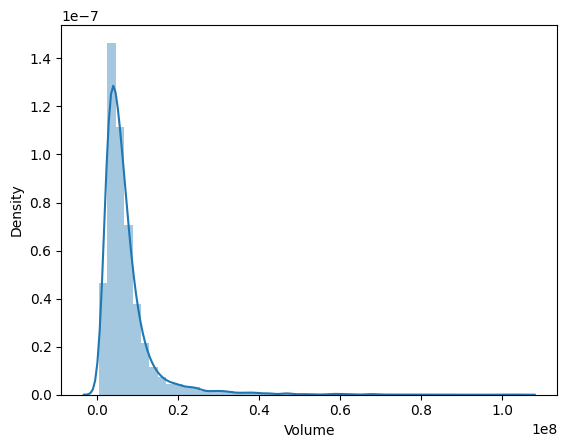

In [ ]:
sns.distplot(data.Volume)

<ipython-input-27-98b3ab8dbcd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.High)


<Axes: xlabel='High', ylabel='Density'>

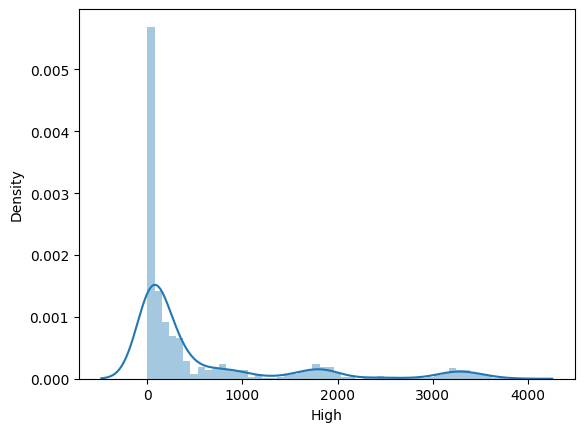

In [ ]:
sns.distplot(data.High)

<ipython-input-28-65e566960d46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

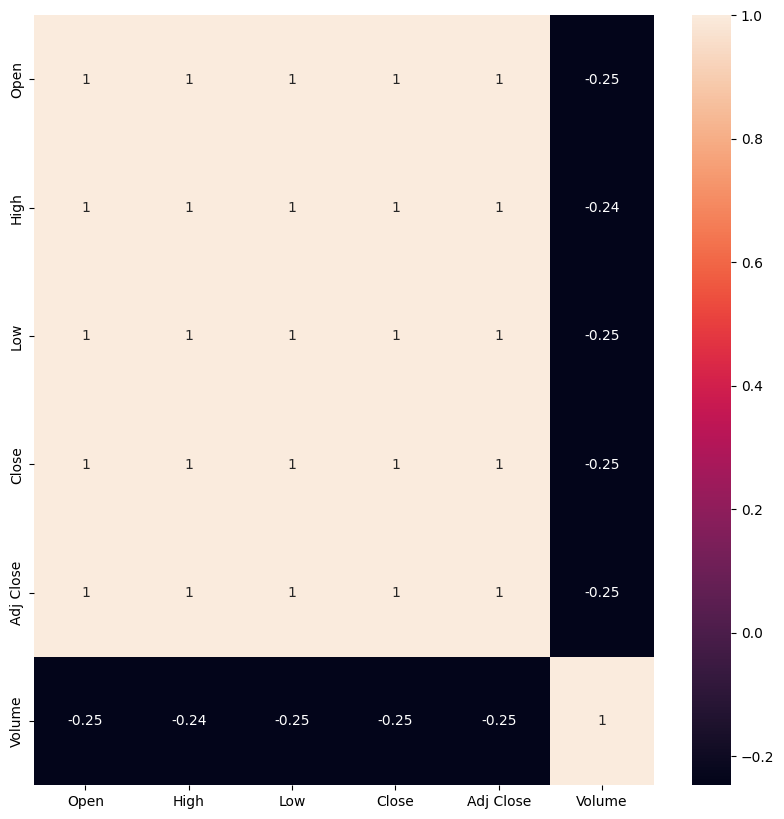

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)